# Water Quality Monitoring with Machine Learning

## Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import pickle

pd.set_option('display.max_columns', None)

## Data Import

***Please uncomment the code below if you are running the notebook for first time and don't have the csv downloaded in your working directory***

In [2]:
!pip install -q kaggle

In [3]:
!kaggle datasets download -d nayanack/water-probability

Dataset URL: https://www.kaggle.com/datasets/nayanack/water-probability
License(s): CC0-1.0
  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 76.3MB/s]


In [4]:
!unzip -f water-probability.zip

Archive:  water-probability.zip


#### Uncomment it when trying to run on Colab

from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/MyDrive/"Colab Notebooks"/water_potability.csv /content/water_potability.csv

In [12]:
df_water_potability  = pd.read_csv('water_potability.csv')

In [13]:
df_water_potability.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [14]:
df_water_potability.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [15]:
list(df_water_potability)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

### Domain Knowledge

***Since we are not too good in the data domain knowlegde, it will be good to ask our AI-Assistance some domain questions and read about each features***

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [2]:
%load_ext jupyter_ai_magics

#### ph

In [3]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "ph" of the water. Can you tell us about "ph" and how it affects water potability?

### pH and Water Potability

The pH level of water is a measure of how acidic or basic it is. The pH scale ranges from 0 to 14, with 7 being considered neutral. 

In terms of water potability, the pH level can play a significant role. Water with a pH below 6.5 may be acidic and potentially corrosive, which can lead to leaching of metals from pipes and fixtures. On the other hand, water with a pH above 8.5 may be considered basic and could have a bitter taste.

For drinking water, the ideal pH range is typically between 6.5 and 8.5. Water with a pH within this range is considered safe and potable for consumption. 

Therefore, monitoring and maintaining the pH level of water is an important factor in determining its potability.

#### Hardness

In [4]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Hardness" of the water. Can you tell us about "Hardness" and how it affects water potability?

### Hardness in Water and its Impact on Potability

Hardness in water refers to the concentration of minerals such as calcium and magnesium in the water. These minerals can be present in the form of dissolved salts, primarily calcium carbonate and magnesium carbonate. 

The hardness of water can have both positive and negative impacts on water potability:

- **Positive Impact:** 
  - Calcium and magnesium are essential minerals for human health, and drinking water with moderate hardness levels can contribute to meeting daily intake requirements.
  - Hard water can also have a less corrosive effect on pipes and plumbing systems compared to soft water.

- **Negative Impact:**
  - High levels of hardness can lead to the formation of scale deposits in pipes, water heaters, and appliances, reducing their efficiency and lifespan.
  - Hard water can also interfere with the lathering of soap and detergents, leading to increased consumption and potentially causing skin irritation.

In terms of potability, moderate hardness levels are generally considered safe for drinking water consumption. However, excessively hard water may require treatment to reduce the mineral content to acceptable levels. Testing the hardness of water is an important step in assessing its quality and determining the appropriate treatment methods for ensuring potability.

#### Solids

In [5]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Solids" of the water. Can you tell us about "Solids" and how it affects water potability?

**Solids in Water:**

Solids in water refer to any dissolved or suspended particles that are present in the water. These solids can come from various sources such as minerals, organic matter, and bacteria.

**Impact on Water Potability:**

The presence of solids in water can have a significant impact on its potability. High levels of solids can affect the taste, odor, and appearance of the water, making it unpalatable for consumption.

Furthermore, certain types of solids, such as heavy metals or harmful bacteria, can pose serious health risks if ingested. It is important to monitor the levels of solids in water to ensure that it meets the necessary standards for potability.

In conclusion, the presence of solids in water can greatly affect its potability. It is essential to regularly test and treat water to ensure that it is safe for consumption.

#### Chloramines

In [6]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Chloramines" of the water. Can you tell us about "Chloramines" and how it affects water potability?

Chloramines are a group of chemicals that are commonly used as disinfectants in water treatment processes. They are formed when ammonia is added to water that already contains chlorine. Chloramines are effective in killing bacteria and other harmful microorganisms in water.

However, high levels of chloramines in drinking water can have negative effects on human health. Long-term exposure to chloramines has been linked to respiratory issues, skin irritation, and other health problems. Therefore, it is important to monitor and control the levels of chloramines in drinking water to ensure its potability.

In conclusion, while chloramines are effective disinfectants, their presence in high levels in drinking water can have negative effects on human health. Monitoring and controlling the levels of chloramines is essential to ensure the potability of water.

#### Sulfate

In [7]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Sulfate" of the water. Can you tell us about "Sulfate" and how it affects water potability?

### Sulfate in Water Potability

Sulfate is a chemical compound often found in water sources. In small amounts, sulfate is generally not harmful to human health and does not affect the potability of water. However, high levels of sulfate in drinking water can have adverse effects on the taste, odor, and overall quality of the water.

Excessive sulfate in water can also cause laxative effects and gastrointestinal issues in some individuals. Additionally, sulfate can react with other chemicals in water to form sulfide, which can create a rotten egg smell and taste.

Therefore, it is important to monitor sulfate levels in drinking water to ensure that it meets the standards for potability. If sulfate levels are found to be above recommended guidelines, appropriate treatment methods should be implemented to ensure the safety and quality of the water.

#### Conductivity

In [8]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Conductivity" of the water. Can you tell us about "Conductivity" and how it affects water potability?

Conductivity is a measure of a substance's ability to conduct an electric current. In the case of water, conductivity is influenced by the presence of dissolved ions such as salts and minerals. 

High conductivity in water can indicate the presence of contaminants such as heavy metals or pollutants, which can make the water unsafe for consumption. On the other hand, low conductivity can suggest the absence of dissolved solids and contaminants, making the water more likely to be potable.

Therefore, measuring conductivity can help in assessing the overall quality and potability of water. It is important to consider conductivity along with other factors such as pH, turbidity, and levels of specific contaminants to determine the safety of water for drinking purposes.

#### Organic_carbon

In [9]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Hardness" of the water. Can you tell us about "Hardness" and how it affects water potability?

### Hardness in Water

Hardness in water refers to the concentration of minerals such as calcium and magnesium present in the water. These minerals can cause scaling in pipes and appliances, as well as affect the taste of the water. 

In terms of water potability, hardness is not typically a health concern. However, extremely hard water can have negative impacts on plumbing and appliances. It can also affect the effectiveness of soaps and detergents, leading to the need for increased usage.

In general, water with moderate hardness levels is considered safe to drink. However, if the hardness levels are very high, it may be necessary to treat the water to reduce scaling and improve its usability for household purposes.

In summary, while hardness in water does not directly impact its potability in terms of health, it can have implications for the usability and maintenance of plumbing systems and appliances.

#### Trihalomethanes

In [10]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Organic_carbon" of the water. Can you tell us about "Organic_carbon" and how it affects water potability?

"Organic carbon" refers to the amount of carbon-containing organic compounds present in water. These compounds can come from natural sources such as decaying plant material or from human activities such as agricultural runoff or industrial discharge.

The presence of organic carbon in water can affect its potability in several ways. High levels of organic carbon can lead to the formation of disinfection byproducts when the water is treated with chlorine, which can be harmful to human health. Organic carbon can also provide a food source for bacteria, leading to bacterial growth and potential contamination of the water.

In general, low levels of organic carbon are preferable for water potability as they are less likely to cause water quality issues. Water treatment processes such as activated carbon filtration can help reduce organic carbon levels in water and improve its potability.

#### Turbidity

In [11]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Turbidity" of the water. Can you tell us about "Turbidity" and how it affects water potability?

# Turbidity and its Impact on Water Potability

**Turbidity** is a measure of the cloudiness or haziness of water caused by suspended particles such as clay, silt, organic matter, and other debris. It is an important indicator of water quality as high turbidity levels can indicate the presence of contaminants and pathogens.

High turbidity in water can affect its potability in several ways:

1. **Aesthetic Concerns:** Water with high turbidity may appear cloudy or dirty, making it unappealing for consumption.

2. **Effectiveness of Treatment:** High turbidity can interfere with the effectiveness of water treatment processes such as filtration and disinfection, leading to inadequate removal of contaminants.

3. **Health Risks:** Turbidity can serve as a medium for the growth and survival of pathogens, increasing the risk of waterborne diseases.

4. **Environmental Impact:** High turbidity levels can also impact aquatic ecosystems by reducing light penetration and disrupting the habitat of aquatic organisms.

Therefore, monitoring turbidity levels in water is crucial for ensuring its potability and safety for consumption.

## Data Exploration

### Heat Maps

<Axes: >

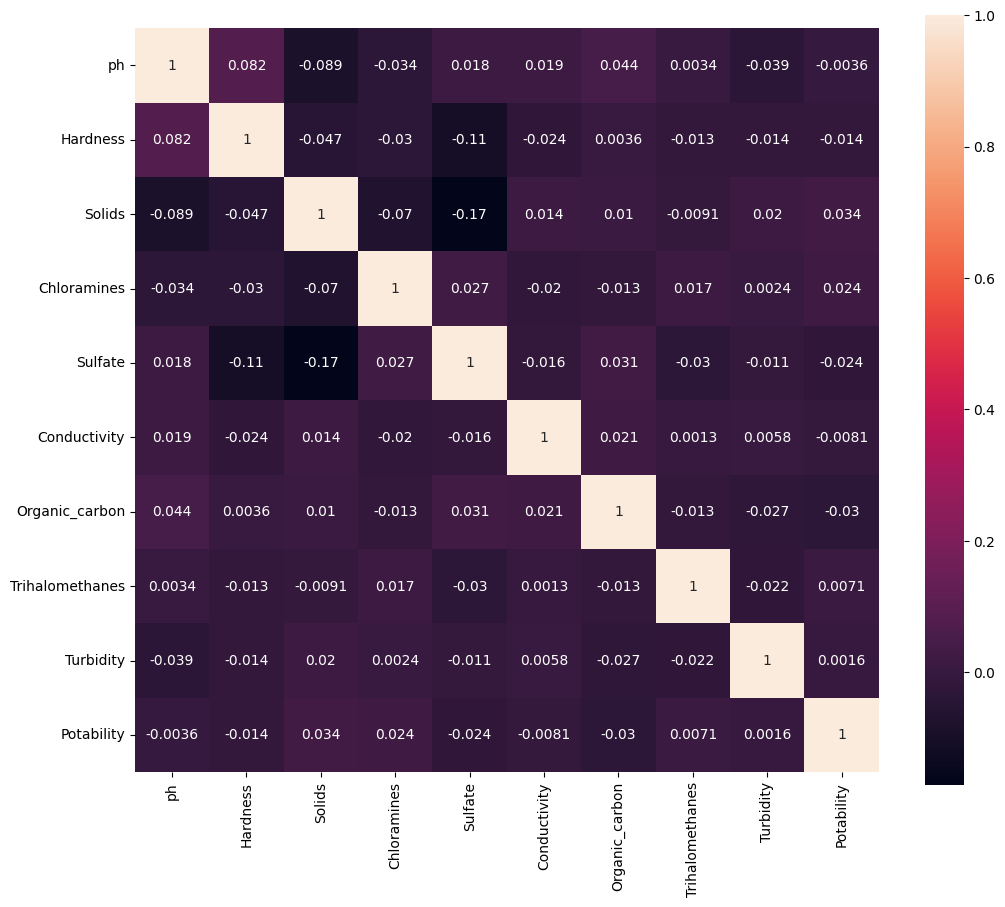

In [17]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_water_potability.corr(), square=True, annot=True, cbar=True, ax=ax)

### Pair plot

In [18]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_water_potability, hue='Potability')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Box plot

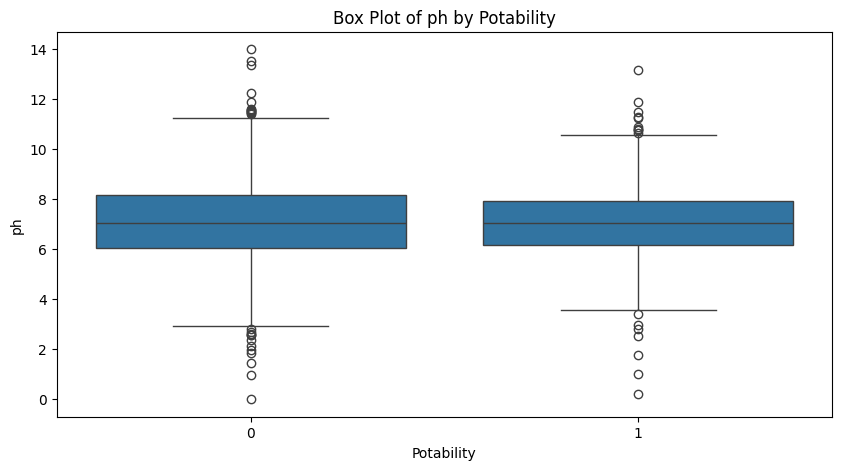

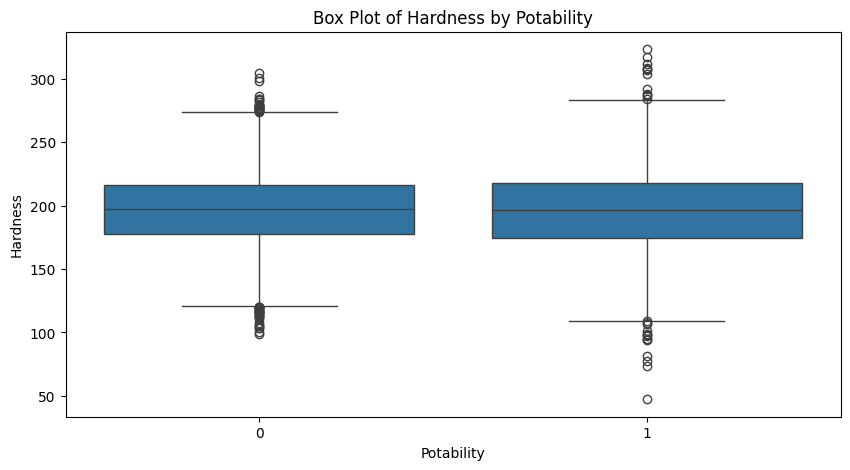

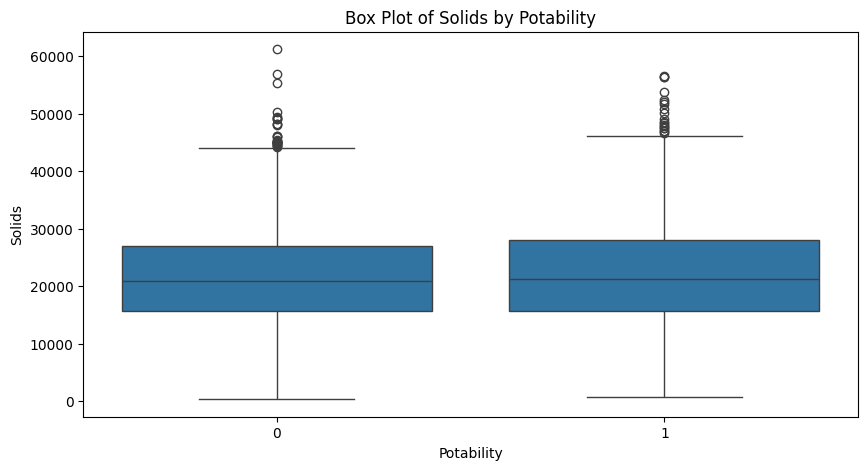

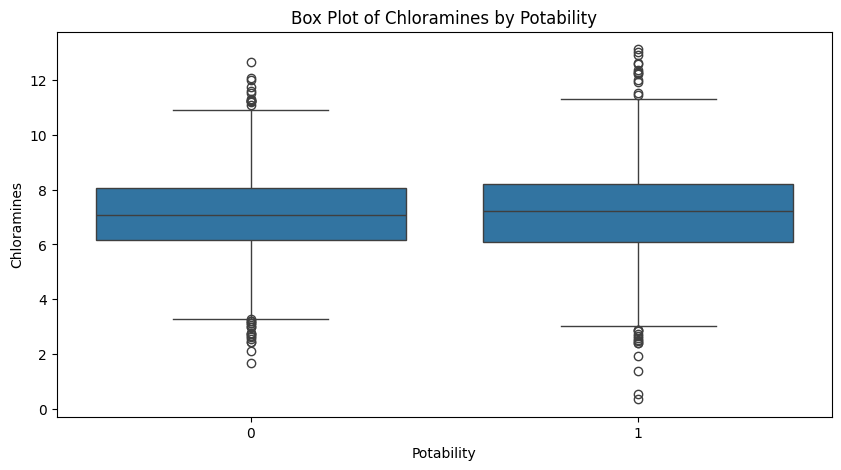

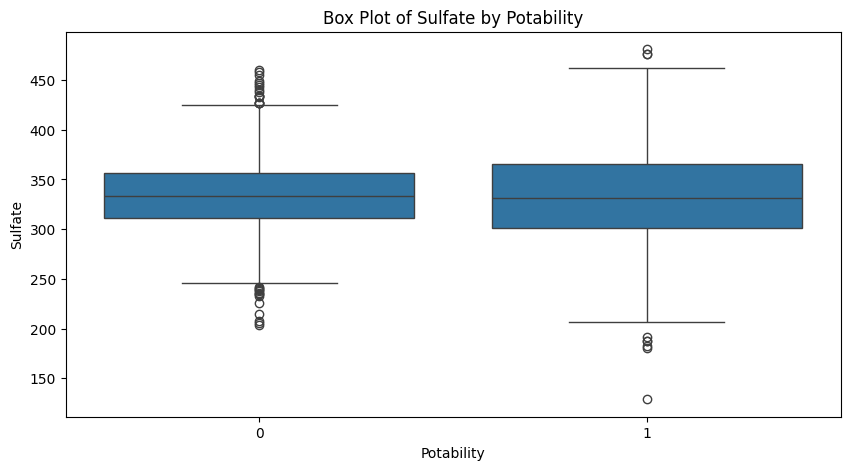

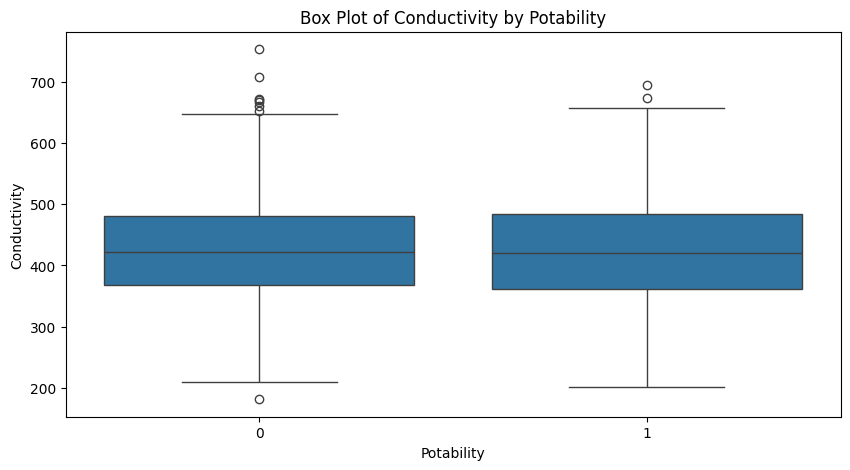

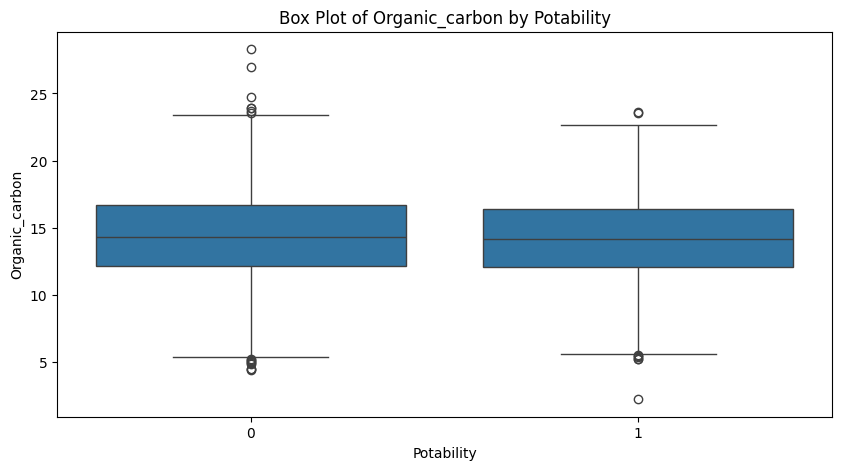

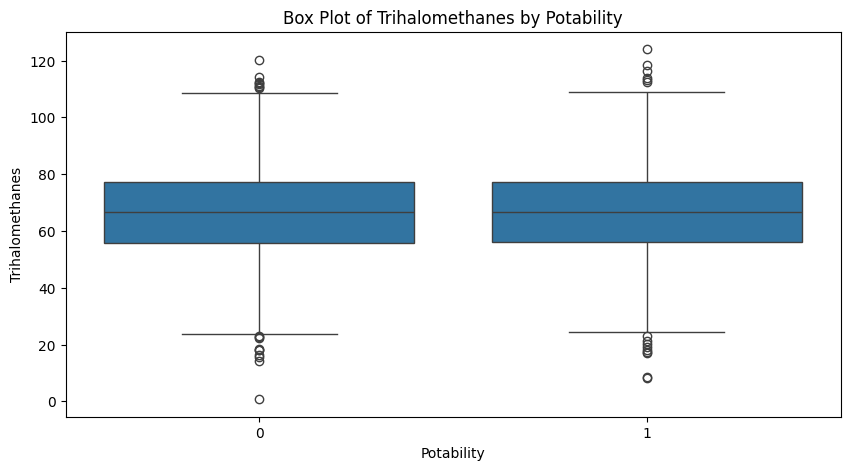

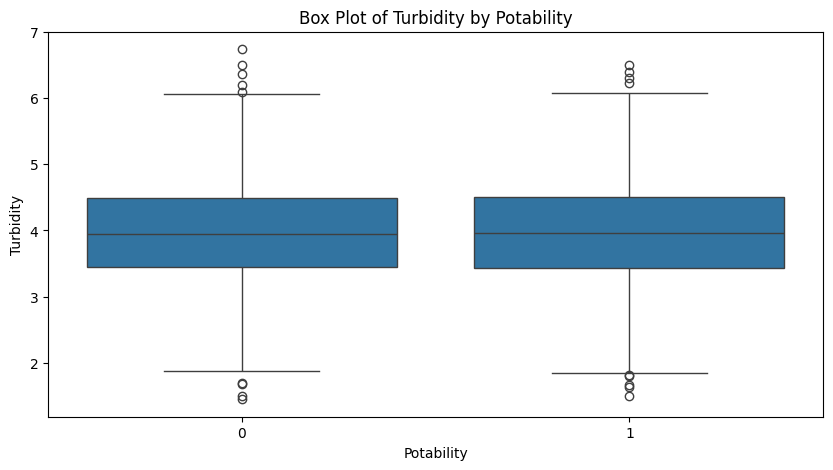

In [19]:
for column in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Potability', y=column, data=df_water_potability)
    plt.title(f'Box Plot of {column} by Potability')
    plt.show()

### Violin plot

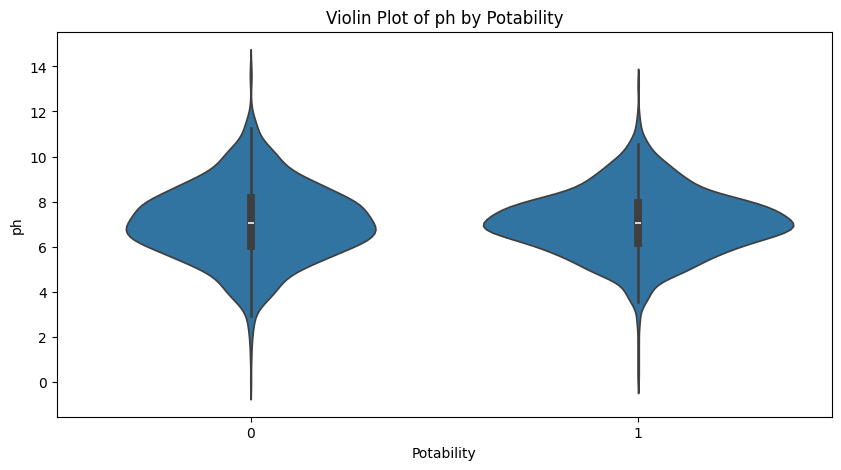

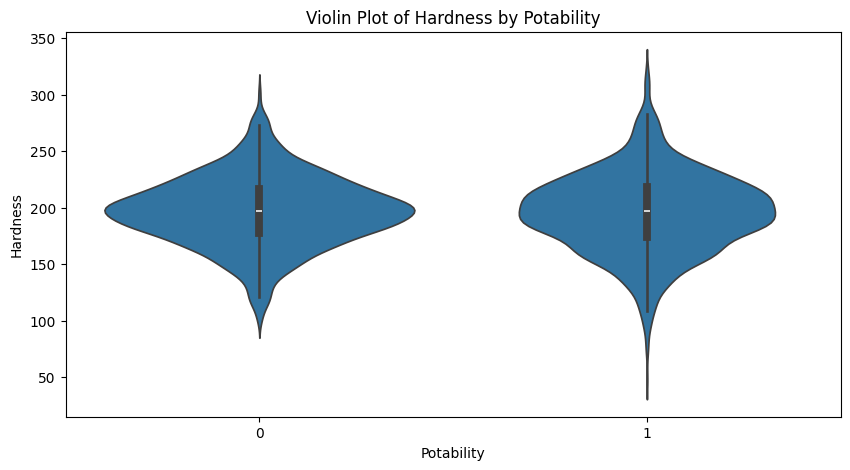

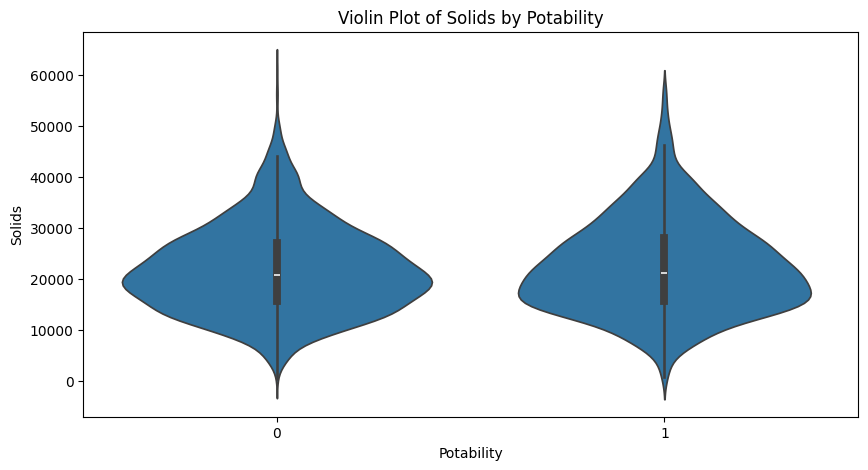

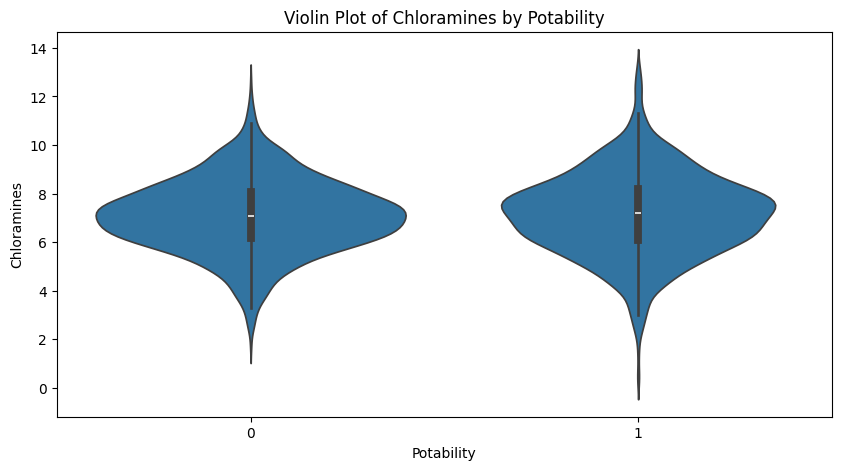

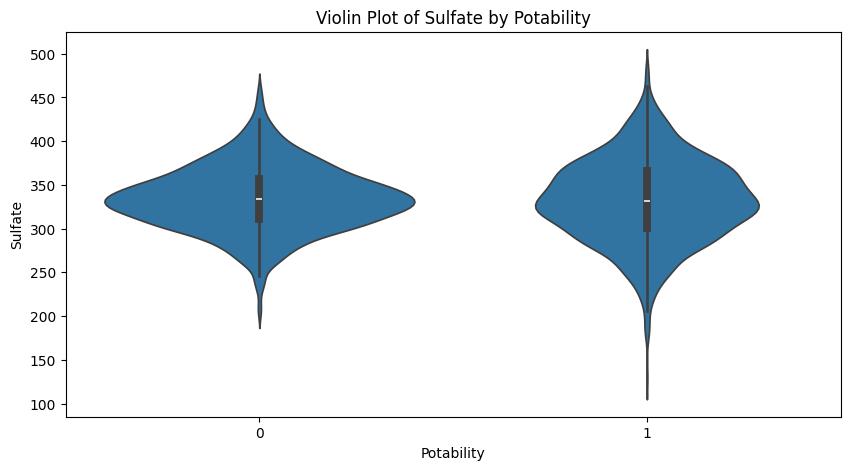

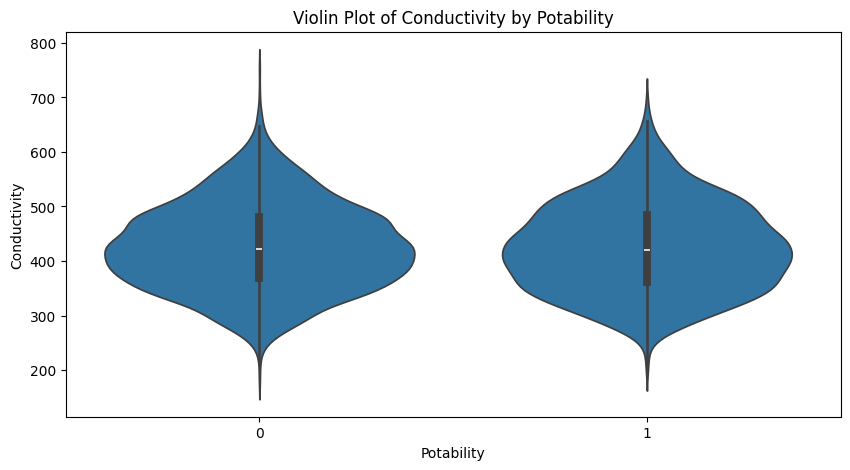

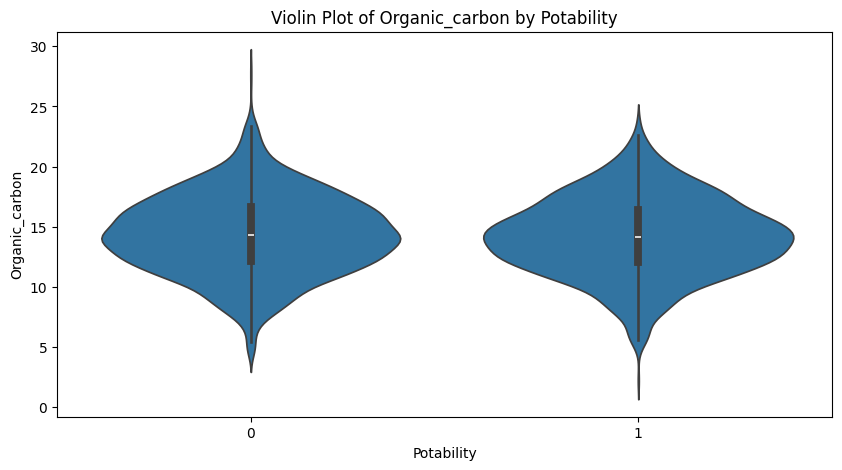

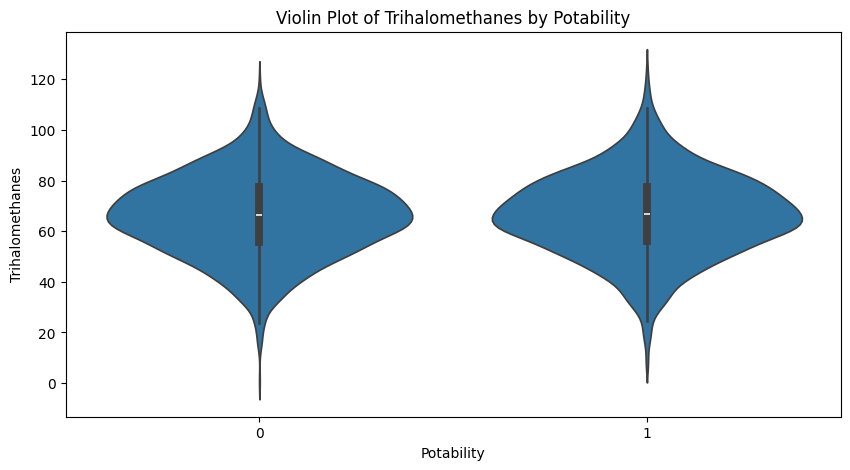

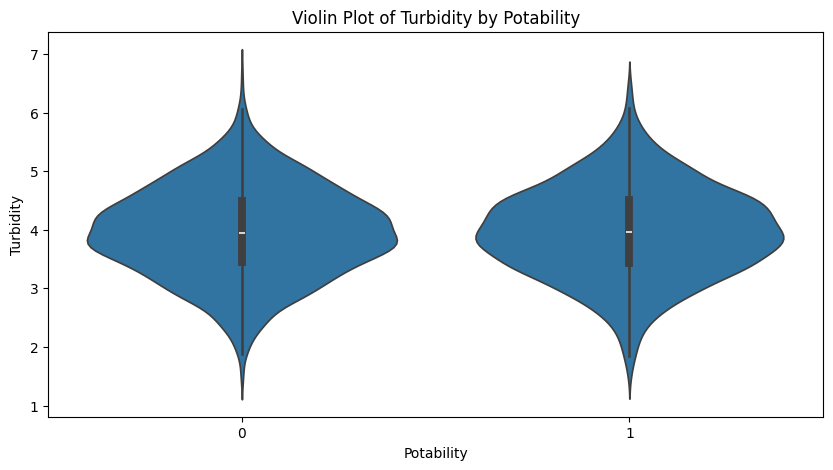

In [20]:
for column in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Potability', y=column, data=df_water_potability)
    plt.title(f'Violin Plot of {column} by Potability')
    plt.show()

### Swarm plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


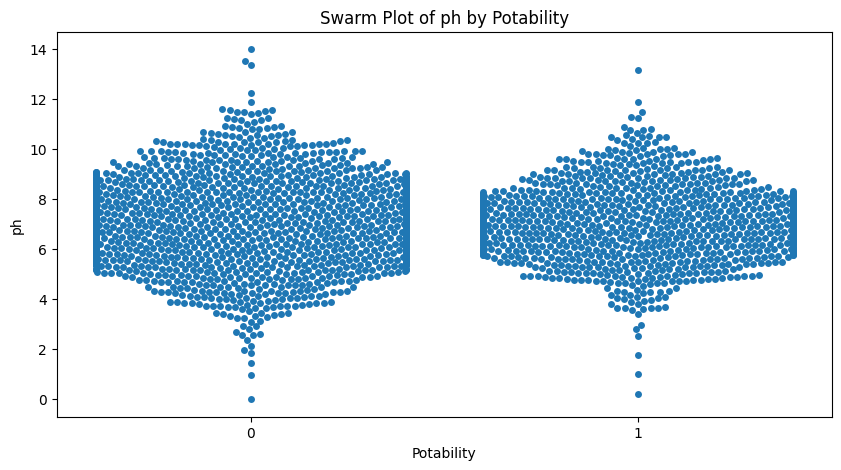

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


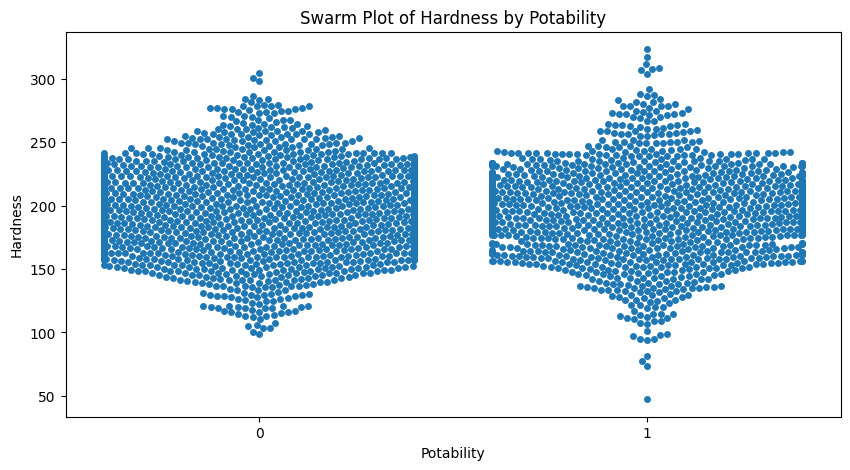

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


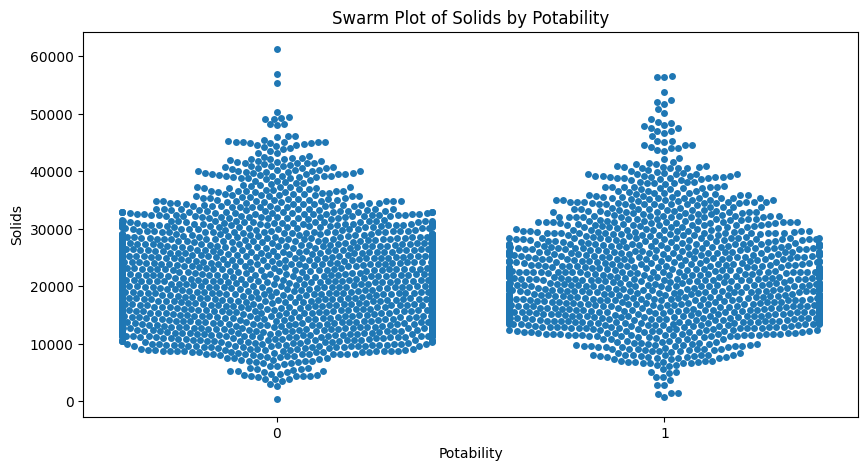

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


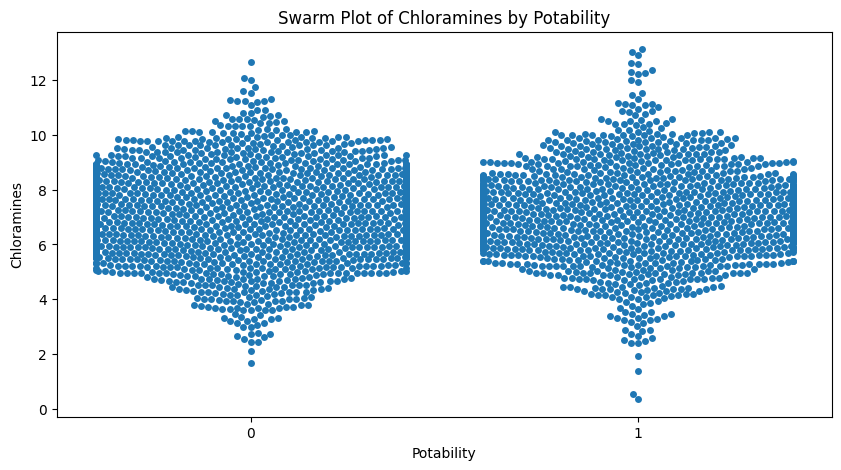

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


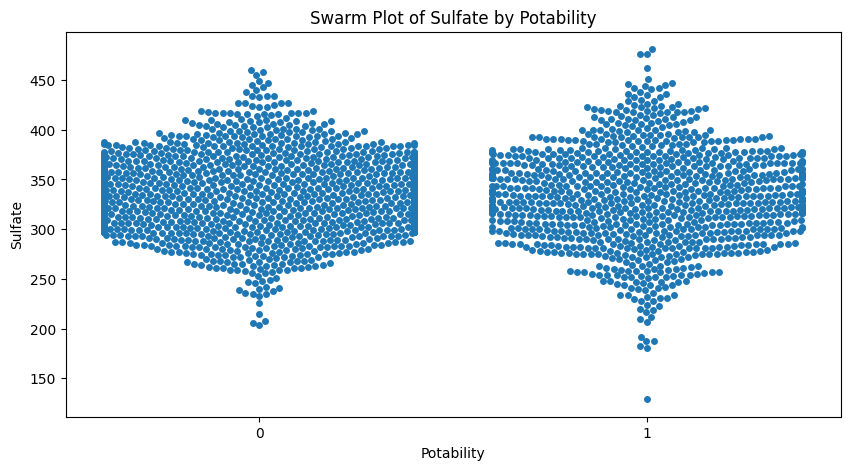

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


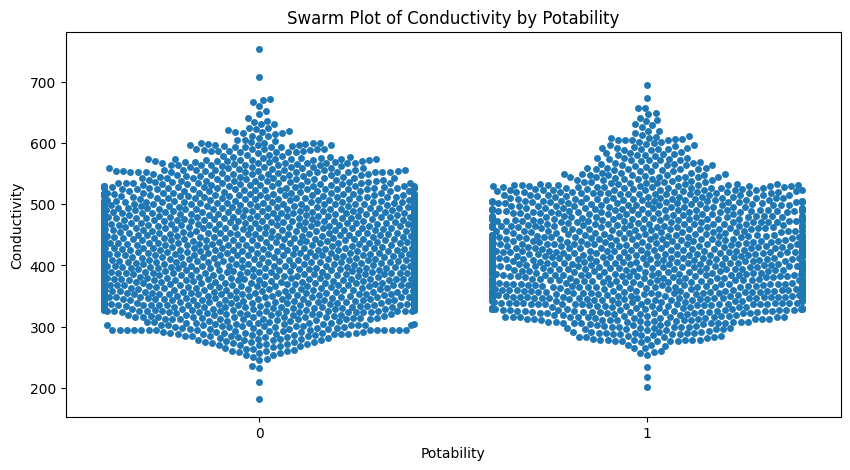

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


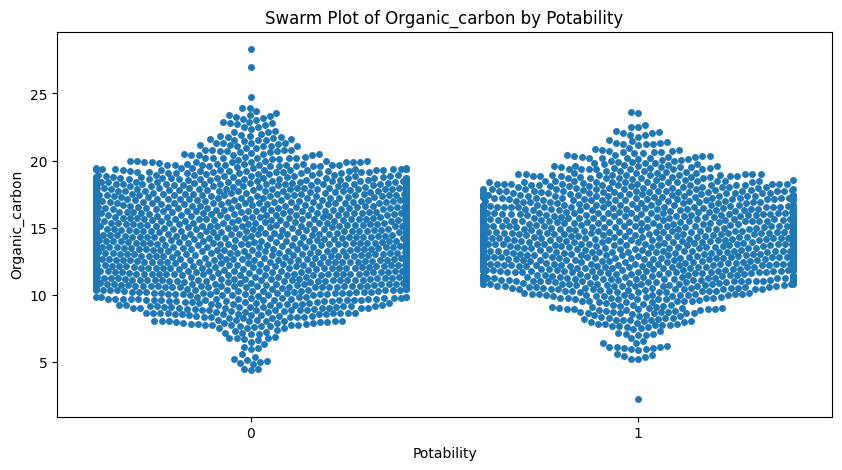

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


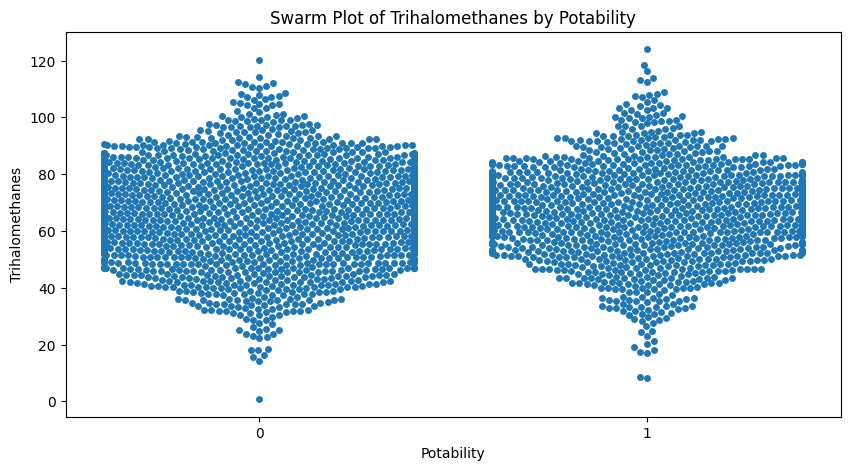

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


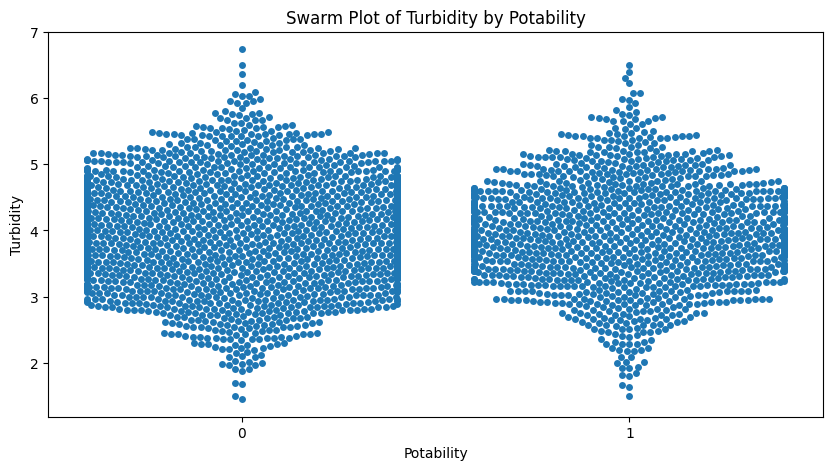

In [21]:
for column in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    plt.figure(figsize=(10, 5))
    sns.swarmplot(x='Potability', y=column, data=df_water_potability)
    plt.title(f'Swarm Plot of {column} by Potability')
    plt.show()

###

****A box plot offers a visual representation of the distribution, central tendency, and spread of the dataset, helping to identify outliers and understand the variability and skewness of the Potability. The plot reveals numerous outliers in both categories: 0 (water is not potable) and 1 (water is potable).***

***The heatmap visually depicts the relationships between pairs of variables within the dataset, offering insights into the strength and direction of linear relationships among variables. A correlation coefficient close to 1 signifies a strong positive correlation, close to -1 indicates a strong negative correlation, and around 0 suggests little to no correlation. From the plot above, it's evident that there is no multicollinearity between the features. Additionally, the features are not strongly correlated with the target variable, which may indicate potential difficulties in classifying water potability.***

###

### Target Variable Analysis

In [22]:
df_water_potability['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [23]:
counts= df_water_potability['Potability'].value_counts()
perc = df_water_potability['Potability'].value_counts(normalize='index') * 100
pd.DataFrame({'count': counts, 'perc- %': perc.round(2)}).reset_index()

,Potability,count,perc- %
0,0,1998,60.99
1,1,1278,39.01


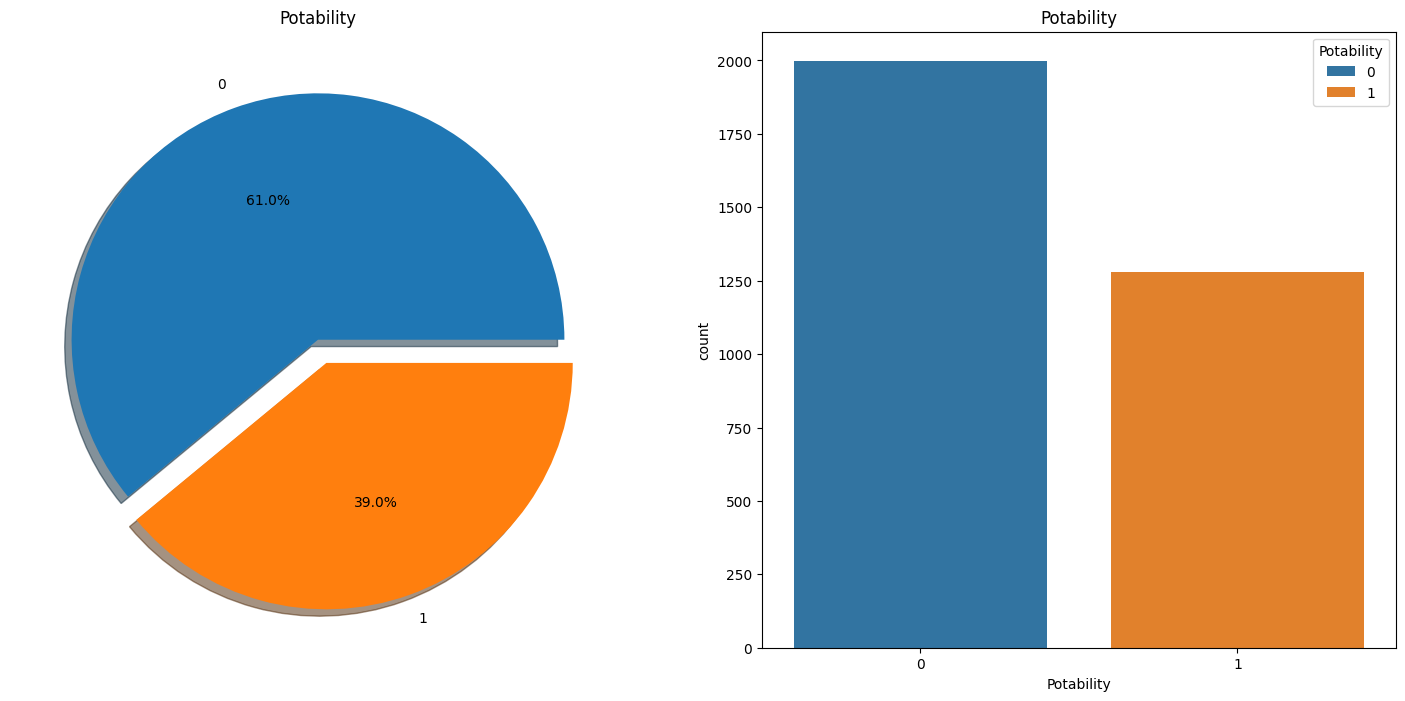

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_water_potability['Potability'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Potability')
ax[0].set_ylabel('')
sns.countplot(x='Potability',data=df_water_potability,ax=ax[1], hue='Potability')
ax[1].set_title('Potability')
plt.show()

###

***From the analysis of the target data distribution and percentages, it is clear that most of the water samples are not potable. We can also deduce that the data is not balanced, which we will address later in the analysis.***

###

### Missing Data

In [25]:
df_water_potability.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [26]:
# percent of missing "PH"
print('Percent of missing data in column "ph" is %.2f%%' %((df_water_potability['ph'].isnull().sum()/df_water_potability.shape[0])*100))

Percent of missing data in column "ph" is 14.99%


In [27]:
# percent of missing "Sulfate"
print('Percent of missing data in column "Sulfate" is %.2f%%' %((df_water_potability['Sulfate'].isnull().sum()/df_water_potability.shape[0])*100))

Percent of missing data in column "Sulfate" is 23.84%


In [28]:
# percent of missing "Trihalomethanes"
print('Percent of missing data in column "Trihalomethanes" is %.2f%%' %((df_water_potability['Trihalomethanes'].isnull().sum()/df_water_potability.shape[0])*100))

Percent of missing data in column "Trihalomethanes" is 4.95%


## Feature Engineering

### Outlier Removal

In [29]:
def remove_outliers(df, key_features):
    mask = pd.Series(True, index=df.index)
    for column in key_features:
        if column in df.select_dtypes(include=['int64', 'float64']).columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            column_mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
            mask = mask & column_mask
    return df[mask].reset_index(drop=True)

In [30]:
key_features = ['Solids', 'Organic_carbon']
df_water_potability_wo = remove_outliers(df_water_potability, key_features)

###

***We aim to reduce the outliers in the data by removing outliers from the Solids and Organic_carbon fields. Given the limited dataset, it would be too harsh to apply this process to all fields.***

### Imputation

***Around 15% of PH, 24% of Sulfate and lastly, 5% percent of the Trihalomethanes data is missing. This percentage is not so high, we can fill the missing age through imputation.***

###

<ipython-input-31-1e2a89de069e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_water_potability['ph'].dropna(), bins=30);


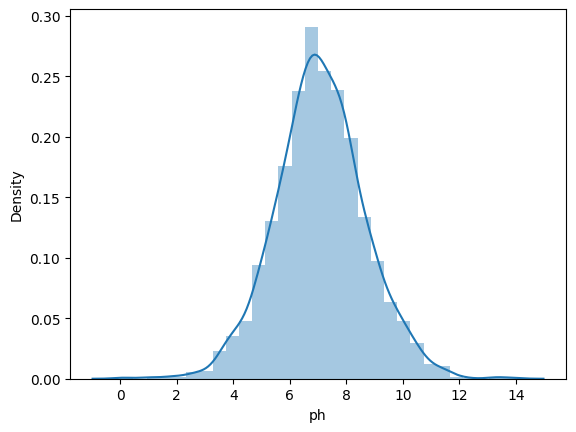

In [31]:
sns.distplot(df_water_potability['ph'].dropna(), bins=30);

<ipython-input-32-8ce1153f2792>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_water_potability['Sulfate'].dropna(), bins=30);


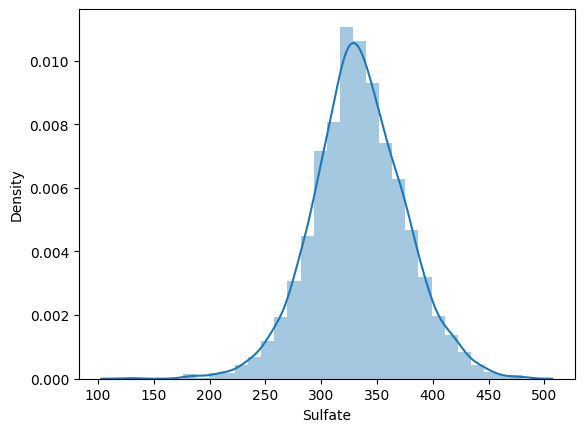

In [32]:
sns.distplot(df_water_potability['Sulfate'].dropna(), bins=30);

<ipython-input-33-ab7bbd27a90b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_water_potability['Trihalomethanes'].dropna(), bins=30);


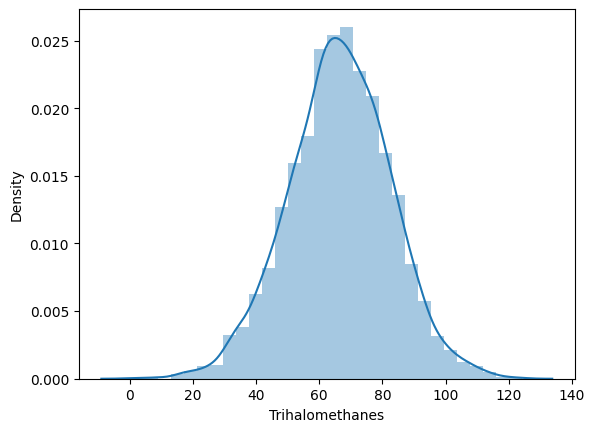

In [33]:
sns.distplot(df_water_potability['Trihalomethanes'].dropna(), bins=30);

***The three dataset distribution are normal and do not skewed and we are safe to use the mean to fill the null value****

In [34]:
ph_mean = df_water_potability_wo['ph'].mean()
sulfate_mean = df_water_potability_wo['Sulfate'].mean()
trihalomethanes_mean = df_water_potability_wo['Trihalomethanes'].mean()

In [35]:
df_water_potability_wo['ph'] = df_water_potability_wo[['ph']].fillna(ph_mean)
df_water_potability_wo['Sulfate'] = df_water_potability_wo[['Sulfate']].fillna(sulfate_mean)
df_water_potability_wo['Trihalomethanes']= df_water_potability_wo[['Trihalomethanes']].fillna(trihalomethanes_mean)

### Data Splitting

In [36]:
X = df_water_potability_wo.drop(columns=['Potability'], axis=1)
y = df_water_potability_wo['Potability']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.20,
                                                    random_state=42)

### Scaling

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

### Principal Component Analysis (PCA)

In [39]:
pca = PCA(n_components=0.95)
components = pca.fit_transform(X_scaled_train)

In [40]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [41]:
d

9

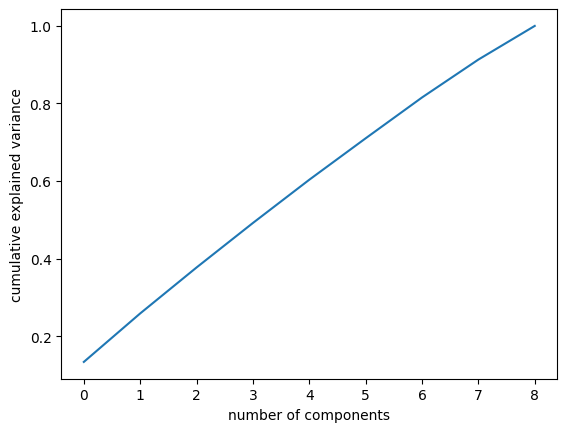

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

***We used PCA to assess feature importance. From the plot above, it is evident that the number of features is linearly correlated with their importance.***

## Model Training and Evaluation

In [43]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Artificial Neural Network': MLPClassifier()
}

parameters = {
    'Logistic Regression': {'solver': ['lbfgs', 'liblinear'],
                            'penalty': ['l2'],
                            'C': [0.01, 0.1, 1, 10]},

    'Decision Tree': {'max_features': ['sqrt', 'log2'],
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 6, 8, 10],
                      'min_samples_split': [2, 5],
                      'min_samples_leaf': [1, 2]},

    'Random Forest': {'max_features': ['sqrt', 'log2'],
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 6, 8, 10],
                      'min_samples_split': [2, 5],
                      'min_samples_leaf': [1, 2],
                      'n_estimators': [100, 200]},

    'Support Vector Machine': {'C': [0.1, 1, 10],
                               'gamma': [0.1, 0.01, 0.001],
                               'kernel': ['rbf', 'linear']},

    'k-Nearest Neighbors': {'n_neighbors': list(range(1, 21)),
                            'weights': ['uniform', 'distance']},

    'Artificial Neural Network': {'solver': ['adam', 'lbfgs'],
                                  'max_iter': [1000, 1500],
                                  'alpha': 10.0 ** -np.arange(1, 5),
                                  'hidden_layer_sizes': [(10,), (12,), (14,)],
                                  'activation': ["logistic", "relu", "tanh"],
                                  'learning_rate': ["constant", "adaptive", 0.001, 0.01, 0.0001],
                                     'shuffle': [True, False]}
}


In [44]:
parameters = {
    'Logistic Regression': {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                            'penalty': [None, 'l2'],
                            'C': [0.001, 0.01, 0.1, 1, 10, 100]},

    'Decision Tree': {'max_features': ['sqrt', 'log2'],
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]},

    'Random Forest': {'max_features': ['sqrt', 'log2'],
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'n_estimators': [100, 200, 300]},

    'Support Vector Machine': {'C': [0.1, 1, 10],
                               'gamma': [0.1, 0.01, 0.001],
                               'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},

    'k-Nearest Neighbors': {'n_neighbors': list(range(1, 31)),
                            'weights': ['uniform', 'distance']},

    'Artificial Neural Network': {'solver': ['adam', 'lbfgs'],
                                  'max_iter': [1000, 1100, 1200, 1300, 1400, 1500, 1600],
                                  'alpha': 10.0 ** -np.arange(1, 10),
                                  'hidden_layer_sizes': [(10,), (20,), (30,),(50,), (100,), (200,)],
                                  'activation': ["logistic", "relu", "tanh"],
                                  'learning_rate': ["constant", "invscaling", "adaptive", 0.001, 0.01, 0.0001],
                                     'shuffle': [True, False]}
}

In [45]:
def model_training(classifiers, parameters, X_train, y_train):
    """
    The function uses randomsearch to look through the hyperparameters space to get the best models.
    """
    trained_models = {}
    for name, clf in classifiers.items():
        print(f"Now training {name}")
        params = parameters[name]
        """grid_search = GridSearchCV(estimator=clf,
                                   param_grid=params,
                                   scoring='accuracy',
                                   cv=10,
                                   verbose=0,
                                  n_jobs =-1)"""
        randomized_search = RandomizedSearchCV(estimator=clf,
                                               param_distributions=params,
                                               n_iter=50,
                                               scoring='accuracy',
                                               cv=10,
                                               verbose=1,
                                               n_jobs=-1)
        randomized_search.fit(X_train, y_train)
        best_model = randomized_search.best_estimator_
        trained_models[name] = best_model
        print(f"Done training {name}")
    return trained_models

In [46]:
def model_pred(models_cls, X_train, X_test, y_train, y_test):
    result = {}
    for name, clf in models_cls.items():
        predict = {}
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        predict['y_train_pred'] = y_train_pred
        predict['y_test_pred'] = y_test_pred
        predict['accuracy_score_train'] = accuracy_score(y_train, y_train_pred)
        predict['accuracy_score_test'] = accuracy_score(y_test, y_test_pred)
        predict['precision_score'] = precision_score(y_test, y_test_pred)
        predict['recall_score'] = recall_score(y_test, y_test_pred)
        predict['f1_score'] = f1_score(y_test, y_test_pred)
        predict['confusion_matrix'] = confusion_matrix(y_test, y_test_pred)
        predict['classification_report'] = classification_report(y_test, y_test_pred)
        result[name] = predict
    return result

In [47]:
def print_results(preds):
    for name, pred in preds.items():
        if name not in ['y_train_pred', 'y_test_pred']:
            print('---------------------------------------------------')
            print(f'The {name} is: \n {pred}')
            print('---------------------------------------------------')

In [48]:
training = model_training(classifiers, parameters, X_scaled_train, y_train)

Now training Logistic Regression
Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1216, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(mult

Done training Logistic Regression
Now training Decision Tree
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Done training Decision Tree
Now training Random Forest
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Done training Random Forest
Now training Support Vector Machine
Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Done training Support Vector Machine
Now training k-Nearest Neighbors
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Done training k-Nearest Neighbors
Now training Artificial Neural Network
Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-

Done training Artificial Neural Network


In [49]:
prediction = model_pred(training, X_scaled_train, X_scaled_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

#### Logistic Regression

In [50]:
y_test_pred = prediction.get('Logistic Regression').get('y_test_pred')

In [51]:
y_train_pred = prediction.get('Logistic Regression').get('y_train_pred')

In [52]:
print_results(prediction.get('Logistic Regression'))

---------------------------------------------------
The accuracy_score_train is: 
 0.6002340093603744
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6505460218408736
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.0
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.0
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.0
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[417   0]
 [224   0]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recall  f1-score   support

        

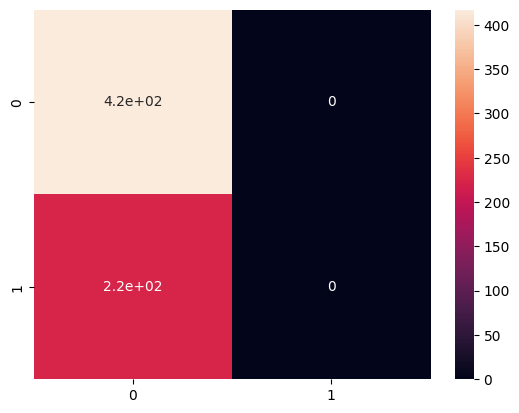

In [53]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***The logistic regression model achieved an accuracy of 65% on the test data. However, it performed well in predicting samples labeled as not potable (class 0) with a precision of 65% and a recall of 100%. In contrast, its performance on potable samples (class 1) was poor, with a precision and recall of 0%. Overall, the model’s ability to correctly classify potable samples needs improvement.***

#### Decision Tree

In [54]:
y_test_pred = prediction.get('Decision Tree').get('y_test_pred')

In [55]:
y_train_pred = prediction.get('Decision Tree').get('y_train_pred')

In [56]:
print_results(prediction.get('Decision Tree'))

---------------------------------------------------
The accuracy_score_train is: 
 0.6805772230889235
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6583463338533542
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.5396825396825397
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.15178571428571427
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.23693379790940763
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[388  29]
 [190  34]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pr

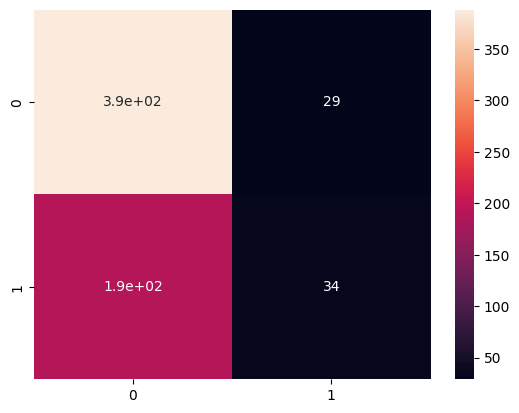

In [57]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***The decision tree model achieved an accuracy of 66% on the test data. It demonstrated a higher precision in predicting not potable samples (class 0) compared to logistic regression, with a precision of 67% and a recall of 93%. However, similar to logistic regression, its performance on potable samples (class 1) was weaker, with a precision of 54% and a recall of 15%. Overall, the model's ability to classify potable samples needs improvement, although it shows promise in distinguishing not potable samples.***

### Random Forest

In [58]:
y_test_pred = prediction.get('Random Forest').get('y_test_pred')

In [59]:
y_train_pred = prediction.get('Random Forest').get('y_train_pred')

In [60]:
print_results(prediction.get('Random Forest'))

---------------------------------------------------
The accuracy_score_train is: 
 0.9765990639625585
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6817472698907956
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.5862068965517241
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.30357142857142855
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.39999999999999997
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[369  48]
 [156  68]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pr

***The random forest model achieved an accuracy of 68% on the test data. It showed improved performance compared to both logistic regression and decision trees, with a precision of 70% and a recall of 88% for predicting not potable samples (class 0). However, similar to the decision tree model, its performance on potable samples (class 1) was weaker, with a precision of 59% and a recall of 30%. Overall, the random forest model demonstrated better overall performance compared to logistic regression and decision trees, particularly in classifying not potable samples.***

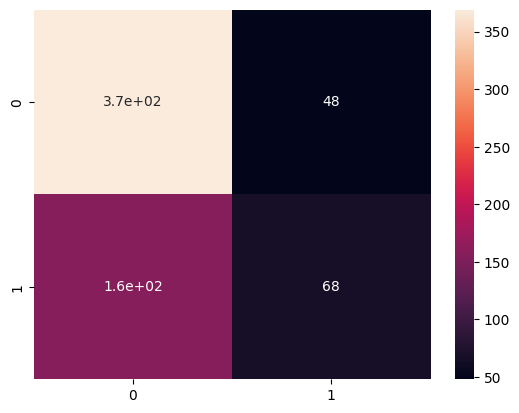

In [61]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

### Support Vector Machine

In [62]:
y_test_pred = prediction.get('Support Vector Machine').get('y_test_pred')

In [63]:
y_train_pred = prediction.get('Support Vector Machine').get('y_train_pred')

In [64]:
print_results(prediction.get('Support Vector Machine'))

---------------------------------------------------
The accuracy_score_train is: 
 0.7226989079563183
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.7004680187207488
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.7
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.25
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.3684210526315789
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[393  24]
 [168  56]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recall  f1-score   s

***The Support Vector Classifier (SVC) achieved an accuracy of 70% on the test data. It showed balanced performance between predicting potable (class 1) and not potable (class 0) samples, with a precision of 70% for both classes. However, the recall for class 1 was lower at 25%, indicating that the model struggled to correctly identify potable samples. Overall, the SVC demonstrated relatively good performance, with balanced precision and recall scores for both classes.***

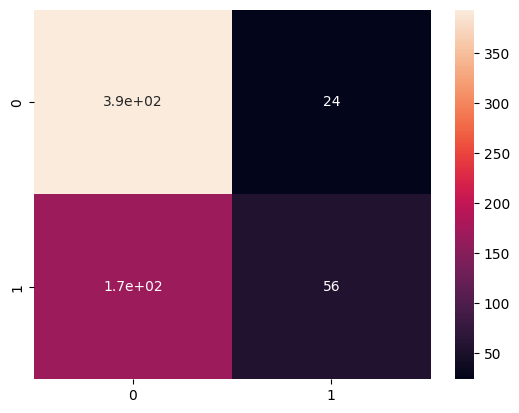

In [65]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

### k-Nearest Neighbors

In [66]:
y_test_pred = prediction.get('k-Nearest Neighbors').get('y_test_pred')

In [67]:
y_train_pred = prediction.get('k-Nearest Neighbors').get('y_train_pred')

In [68]:
print_results(prediction.get('k-Nearest Neighbors'))

---------------------------------------------------
The accuracy_score_train is: 
 1.0
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6708268330733229
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.5866666666666667
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.19642857142857142
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.29431438127090304
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[386  31]
 [180  44]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    reca

***The K-Nearest Neighbors (KNN) classifier achieved an accuracy of 67% on the test data. It demonstrated relatively balanced precision and recall for predicting both potable (class 1) and not potable (class 0) samples. The precision for class 1 was 59%, indicating that the model correctly classified 59% of the potable samples among all samples predicted as potable. However, the recall for class 1 was lower at 20%, suggesting that the model struggled to correctly identify all potable samples in the dataset. Overall, the KNN classifier showed moderate performance, with a slightly higher emphasis on correctly predicting not potable samples.***

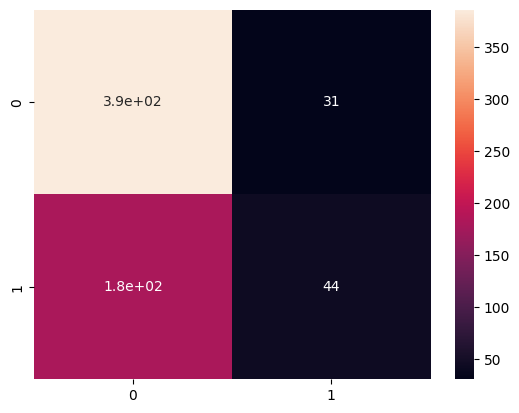

In [69]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

### Artificail Neural Network

In [70]:
y_test_pred = prediction.get('Artificial Neural Network').get('y_test_pred')

In [71]:
y_train_pred = prediction.get('Artificial Neural Network').get('y_train_pred')

In [72]:
print_results(prediction.get('Artificial Neural Network'))

---------------------------------------------------
The accuracy_score_train is: 
 0.6895475819032761
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6739469578783152
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.5503355704697986
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.36607142857142855
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.43967828418230565
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[350  67]
 [142  82]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pr

***The Artificial Neural Network (ANN) achieved an accuracy of 67% on the test data. It demonstrated a precision of 55% for class 1, indicating that among all samples predicted as potable, 55% were actually potable. The recall for class 1 was 37%, suggesting that the model correctly identified 37% of all potable samples in the dataset. Overall, the ANN showed moderate performance, with a relatively balanced emphasis on both precision and recall for predicting potable samples.***

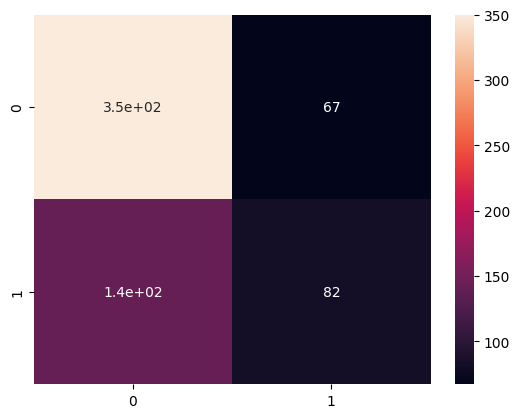

In [73]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***Based on the performance of the different classification models, it's evident that some models outperform others in predicting water portability. Random Forest and Support Vector Machine (SVC) achieved the highest accuracy among all models, both at around 70%. These models also demonstrated relatively balanced precision and recall scores for both potable and non-potable water samples, indicating their effectiveness in correctly identifying both categories.***

***On the other hand, Logistic Regression and Decision Trees showed lower accuracy and poorer performance in terms of precision and recall, particularly for predicting potable water samples. K Nearest Neighbors (KNN) also had moderate performance but struggled with correctly identifying potable samples, as indicated by its lower recall score for class 1.***

***Based on these results, it would be prudent to use Random Forest or SVC models for predicting water portability, as they provide the highest accuracy and balanced performance in terms of precision and recall. This can be crucial for ensuring accurate identification of potable water samples, which is essential for public health and safety. Additionally, further refinement of the models and potentially exploring ensemble methods could lead to even better performance and more reliable predictions.***

***In conclusion, while the model shows good performance in identifying instances of water not potable, there is room for improvement in correctly identifying positive outcomes (potability of the water). Further analysis and potentially model adjustments may be necessary to reduce false positives and false negatives, thus improving the overall performance of the classifier.***

## Model Evaluation

### Imbalance Dataset

***During the exploratory data analysis we have seen that we have Imbalanced Classes, i.e.,the percentage of 0s - not potability of water (61%) examples is much higher with respect to the percentage of 1s - potability of water (39%) examples. Indeed, observing the confusion matrix we saw that the implemented model face some problem in predict the potability of water examples (if a the water is potable for drinking).***

***To face this problem we will apply an over-sampling technique trying to balance our dataset generating Synthetic Samples: it consists in creating new synthetic points from the minority class to increase its cardinality.***

In [74]:
os = SMOTE(random_state=0)

columns = X_train.columns

# Apply oversampling ONLY ON training data
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Potability'])

In [75]:
print("length of oversampled data is ",len(os_data_X))
print("Number of not portability in normal data",len(y[y==0]))
print("Number of portability in normal data",len(y[y==1]))
print("Number of not portability in oversampled data",len(os_data_y[os_data_y['Potability']==0]))
print("Number of portability",len(os_data_y[os_data_y['Potability']==1]))
print("Proportion of no portability data in oversampled data is ",len(os_data_y[os_data_y['Potability']==0])/len(os_data_X))
print("Proportion of portability data in oversampled data is ",len(os_data_y[os_data_y['Potability']==1])/len(os_data_X))

length of oversampled data is  3078
Number of not portability in normal data 1956
Number of portability in normal data 1249
Number of not portability in oversampled data 1539
Number of portability 1539
Proportion of no portability data in oversampled data is  0.5
Proportion of portability data in oversampled data is  0.5


#### Scale the new dataset generated

In [76]:
scaler = StandardScaler()
scaler.fit(os_data_X)
X_scaled_train_os = scaler.transform(os_data_X)
X_scaled_test_os = scaler.transform(X_test)
y_train_os = os_data_y.values

In [77]:
training_os = model_training(classifiers, parameters, X_scaled_train_os, y_train_os)

Now training Logistic Regression
Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1216, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(mult

Done training Logistic Regression
Now training Decision Tree
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Done training Decision Tree
Now training Random Forest
Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Done training Random Forest
Now training Support Vector Machine
Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done training Support Vector Machine
Now training k-Nearest Neighbors
Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Done training k-Nearest Neighbors
Now training Artificial Neural Network
Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
280 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist

Done training Artificial Neural Network


In [78]:
prediction_os = model_pred(training_os, X_scaled_train_os, X_scaled_test_os, y_train_os, y_test)

#### Logistic Regression

In [79]:
y_train_pred = prediction_os['Logistic Regression'].get('y_train_pred')

In [80]:
y_test_pred = prediction_os['Logistic Regression'].get('y_test_pred')

In [81]:
print_results(prediction_os['Logistic Regression'])

---------------------------------------------------
The accuracy_score_train is: 
 0.5243664717348928
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.48673946957878317
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.34513274336283184
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.5223214285714286
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.4156305506216696
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[195 222]
 [107 117]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pr

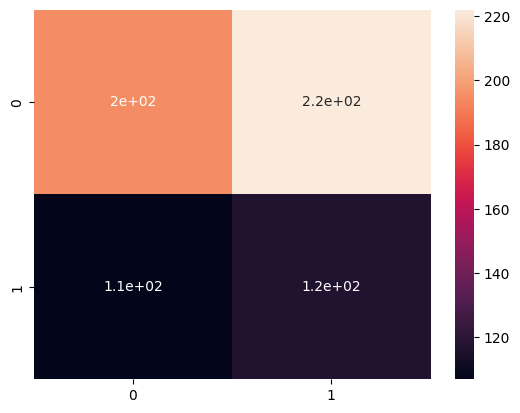

In [82]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***After applying SMOTE to balance the dataset, the Logistic Regression model’s performance improved significantly for the minority class (Class 1, Potable). The precision for Class 1 increased from 0.00 to 0.35, and the recall improved from 0.00 to 0.52. The overall accuracy of the model decreased from 0.65 to 0.49, indicating a trade-off between better detection of the minority class and overall accuracy. The balanced dataset helped the model recognize more potable water instances, but further tuning and optimization are needed to enhance the model’s overall performance.***

#### Decision Tree

In [83]:
y_train_pred = prediction_os['Decision Tree'].get('y_train_pred')

In [84]:
y_train_pred = prediction_os['Decision Tree'].get('y_train_pred')

In [85]:
print_results(prediction_os['Decision Tree'])

---------------------------------------------------
The accuracy_score_train is: 
 0.9551656920077972
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.5834633385335414
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.42124542124542125
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.5133928571428571
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.4627766599597586
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[259 158]
 [109 115]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pre

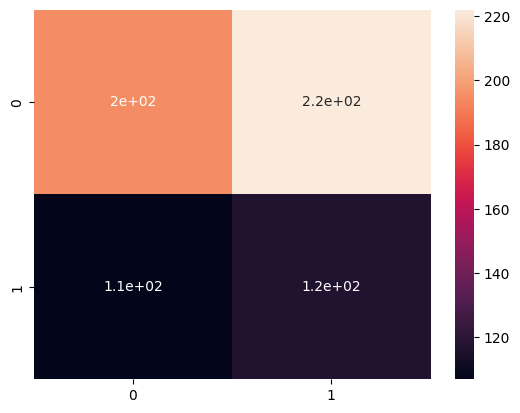

In [86]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***After applying SMOTE to balance the dataset, the Decision Tree model's performance also showed improvement for the minority class (Class 1, Potable). The precision for Class 1 increased from 0.54 to 0.42, and the recall improved significantly from 0.15 to 0.51. The overall accuracy of the model decreased slightly from 0.66 to 0.58. The balanced dataset allowed the model to better identify potable water instances, but there is still room for improvement in balancing precision and recall for both classes. Further refinement and tuning are necessary to optimize the model's performance.***

#### Random Forest

In [87]:
y_train_pred = prediction_os['Random Forest'].get('y_train_pred')

In [88]:
y_test_pred = prediction_os['Random Forest'].get('y_test_pred')

In [89]:
print_results(prediction_os['Random Forest'])

---------------------------------------------------
The accuracy_score_train is: 
 1.0
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6552262090483619
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.5065502183406113
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.5178571428571429
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.512141280353201
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[304 113]
 [108 116]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recall 

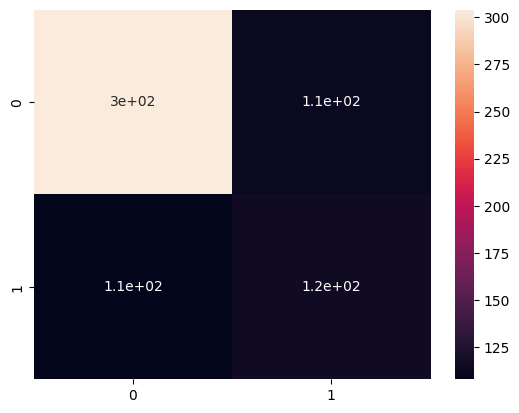

In [90]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***After applying SMOTE to balance the dataset, the Random Forest model's performance for the minority class (Class 1, Potable) improved. The precision for Class 1 increased from 0.70 to 0.51, and recall also improved from 0.25 to 0.52. The overall accuracy of the model remained relatively stable, decreasing slightly from 0.70 to 0.66. The model became better at identifying potable water instances, achieving a more balanced precision and recall. However, there is still a need for further refinement to enhance the overall performance and ensure accurate predictions for both classes.***

#### Support Vector Machine

In [91]:
y_train_pred = prediction_os['Support Vector Machine'].get('y_train_pred')

In [92]:
y_test_pred = prediction_os['Support Vector Machine'].get('y_test_pred')

In [93]:
print_results(prediction_os['Support Vector Machine'])

---------------------------------------------------
The accuracy_score_train is: 
 0.816114359974009
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6287051482059283
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.47651006711409394
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.6339285714285714
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.5440613026819924
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[261 156]
 [ 82 142]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               prec

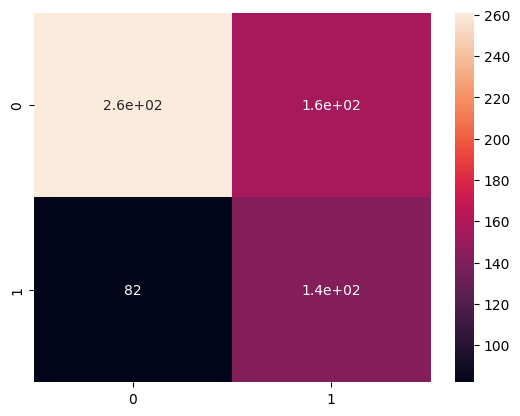

In [94]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***After applying SMOTE to balance the dataset, the SVC model's performance showed notable improvements. The recall for Class 1 (Potable) increased significantly from 0.30 to 0.63, indicating the model became much better at identifying potable water samples. However, the precision for Class 1 decreased slightly, reflecting some trade-off between precision and recall. The overall accuracy of the model improved marginally, suggesting a more balanced performance across both classes. Despite these improvements, further optimization is necessary to achieve a higher f1-score and ensure reliable predictions for both potable and non-potable water samples.***

#### k-Nearest Neighbors

In [95]:
y_train_pred = prediction_os['k-Nearest Neighbors'].get('y_train_pred')

In [96]:
y_test_pred = prediction_os['k-Nearest Neighbors'].get('y_test_pred')

In [97]:
print_results(prediction_os['k-Nearest Neighbors'])

---------------------------------------------------
The accuracy_score_train is: 
 1.0
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.5772230889235569
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.41198501872659177
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.49107142857142855
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.4480651731160896
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[260 157]
 [114 110]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    reca

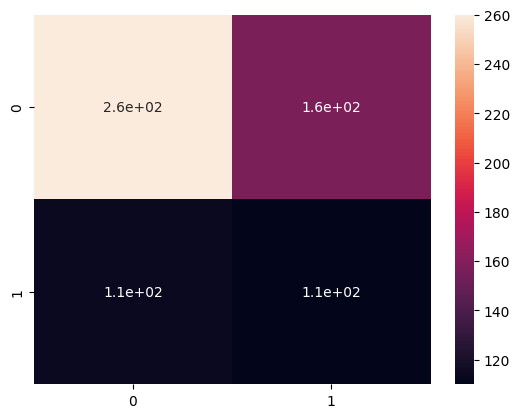

In [98]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***After applying SMOTE to balance the dataset, the K-Nearest Neighbors (KNN) model's performance metrics show a mixed result. The accuracy slightly decreased to 0.58 from 0.67. The recall for Class 1 (Potable) improved from 0.20 to 0.49, indicating better identification of potable water samples. However, the precision for Class 1 decreased, reflecting the increased false positives. The overall precision, recall, and f1-scores indicate that while KNN has improved in recognizing potable water, its overall performance did not improve significantly and is still less effective compared to other models like Random Forest or SVC. Further tuning and model selection may be required for better classification results.***

#### Artificail Neural Network

In [99]:
y_train_pred = prediction_os['Artificial Neural Network'].get('y_train_pred')

In [100]:
y_test_pred = prediction_os['Artificial Neural Network'].get('y_test_pred')

In [101]:
print_results(prediction_os['Artificial Neural Network'])

---------------------------------------------------
The accuracy_score_train is: 
 1.0
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.5912636505460218
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.42748091603053434
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.5
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.46090534979423864
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[267 150]
 [112 112]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recall  f1-score   

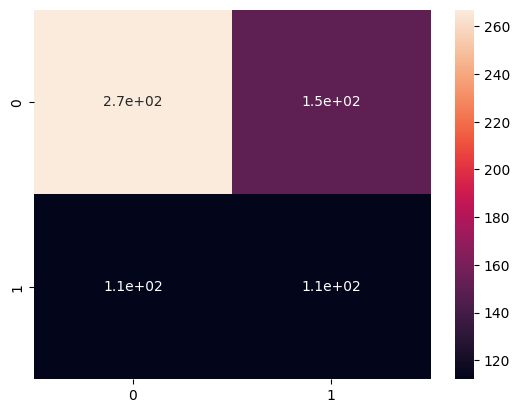

In [102]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***After applying SMOTE to balance the dataset, the Artificial Neural Network (ANN) model's performance metrics show an overall improvement in the recall for Class 1 (Potable), which increased from 0.37 to 0.50. This indicates the model's enhanced ability to correctly identify potable water samples. However, the precision for Class 1 slightly decreased, which means more false positives were introduced. The overall accuracy of the ANN model remained relatively stable at 0.59. Compared to the pre-SMOTE results, the balanced dataset has helped the model to better identify potable water samples, though at the cost of introducing more false positives. This trade-off highlights the importance of further tuning and possibly integrating additional models to achieve a more balanced performance.***

## Model Selection

***After applying SMOTE to address the class imbalance, we observed notable improvements in the models' performance in predicting the potability of water samples. The SMOTE technique improved the recall rates, particularly for Class 1 (potable water), which indicates the models' enhanced ability to correctly identify potable water samples. However, this improvement in recall often came with a trade-off in precision, leading to a slight increase in false positives.***

***Among the evaluated models, the Random Forest classifier demonstrated the most balanced performance, achieving an accuracy of 0.66, with a recall of 0.52 for Class 1 and an overall good balance between precision and recall. This indicates that the Random Forest model is more reliable in identifying both potable and non-potable water samples compared to other models.***

## Model Export

### Unscale the data

In [110]:
X_test_unscaled = scaler.inverse_transform(X_scaled_test_os)

In [114]:

export_path = "data/test_data_water_potability.csv"
unscaled_data = pd.DataFrame(X_test_unscaled, columns=X_test.columns)
unscaled_data['id'] = range(1, len(unscaled_data) + 1)
unscaled_data.to_csv(export_path, index=False)

### Exporting the test data

In [115]:
y_test.to_csv('data/groundtruth.csv', index=False)

### Exporting the model

In [116]:
best_model = training_os['Random Forest']

In [119]:
model_path = "model/water_potability.pkl"

with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

### Export the scaler

In [121]:
scaler_path = "scaler/scaler.pkl"
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

### Future Work or Contributions

#### Increase the hyperparameter spaces

#### Apply more reqularization (Most of the model seems overfit when comparing the training result with the test result)

#### Deep learning